In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
!pip install mlxtend

### 1) load the given dataset  

In [44]:
df=pd.read_excel(r"C:\Users\PRAKASH SUTHAR\Downloads\ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx")

### 2) Check for the null values 

In [45]:
(df.isna().sum()*df.shape[0])*100

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

### 3) Get basic information from data  

In [46]:
df.shape

(8995, 7)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


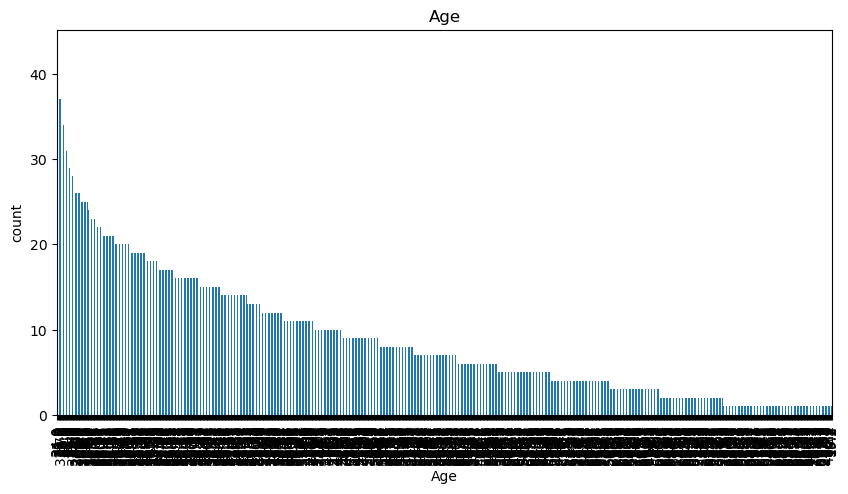

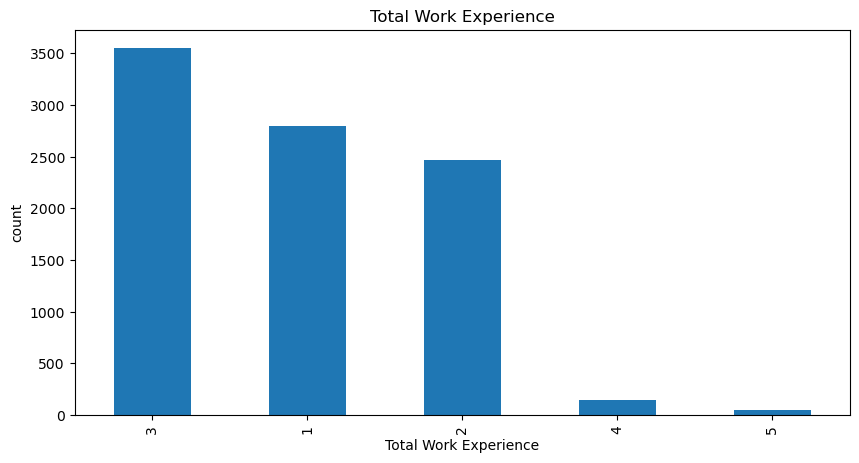

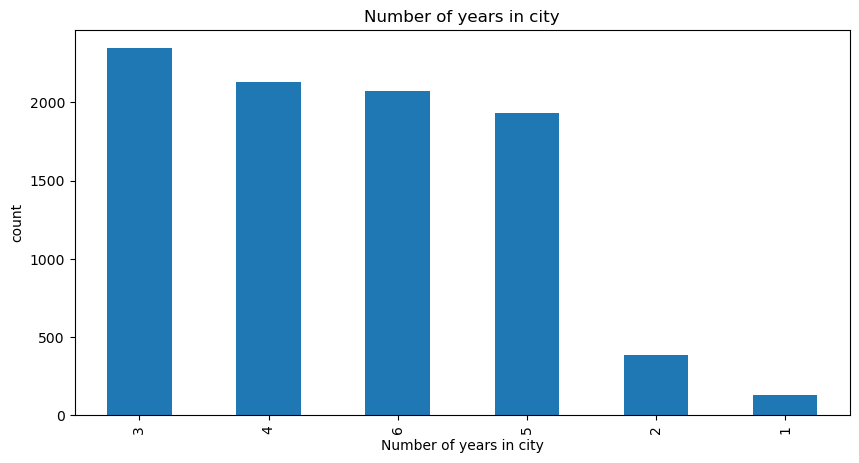

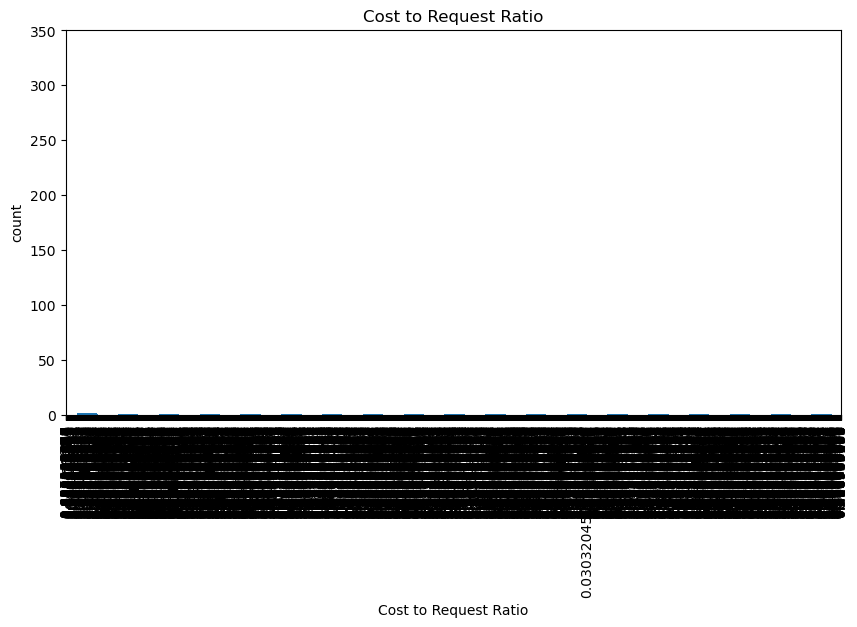

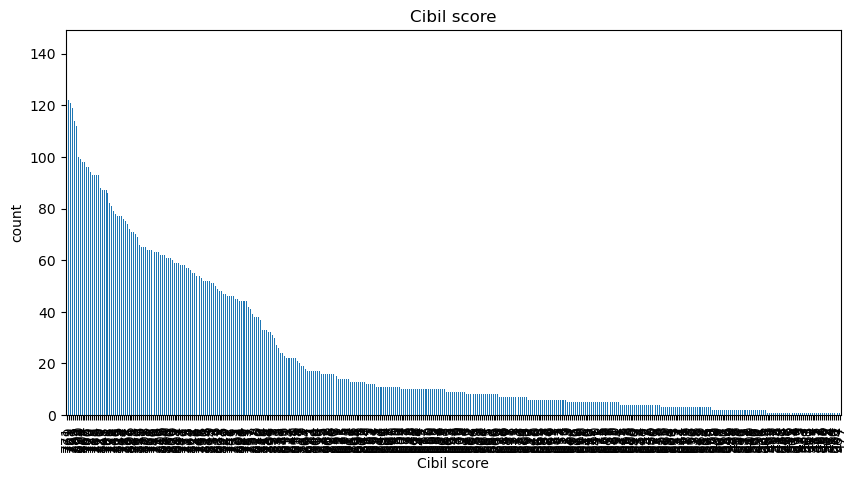

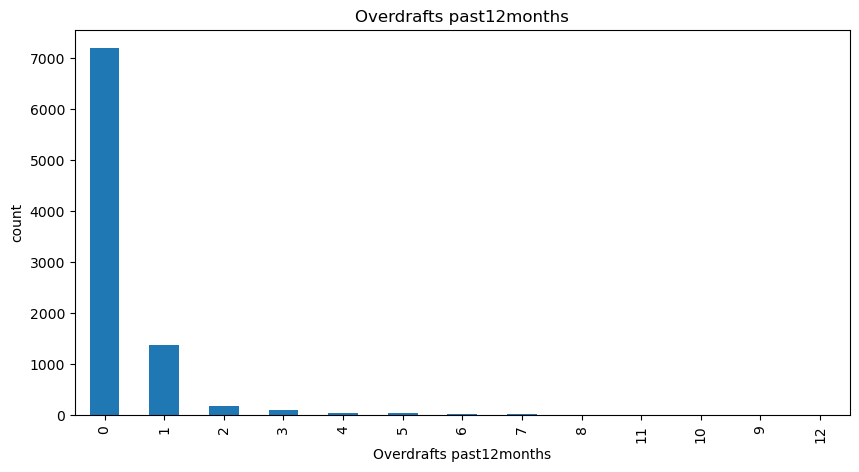

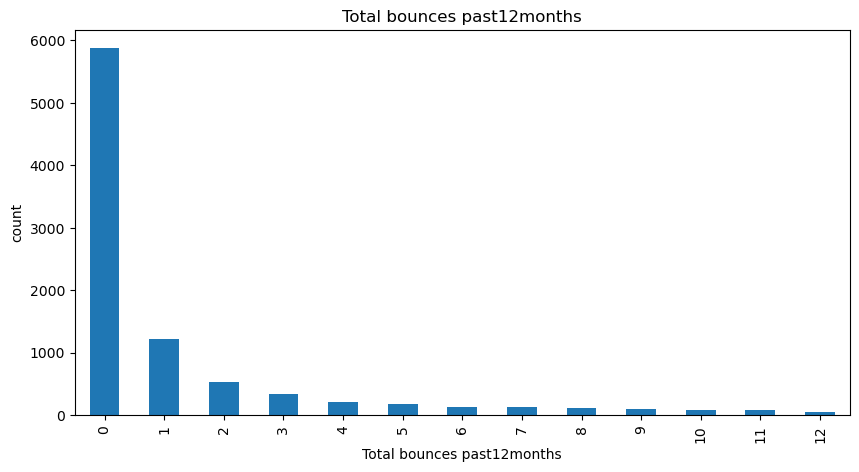

In [48]:
for i in df.columns:
    plt.figure(figsize=[10,5])
    df[i].value_counts().plot(kind="bar")
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

### 4) Describe the dataset 

In [49]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [50]:
corrr=df.corr()

<Axes: >

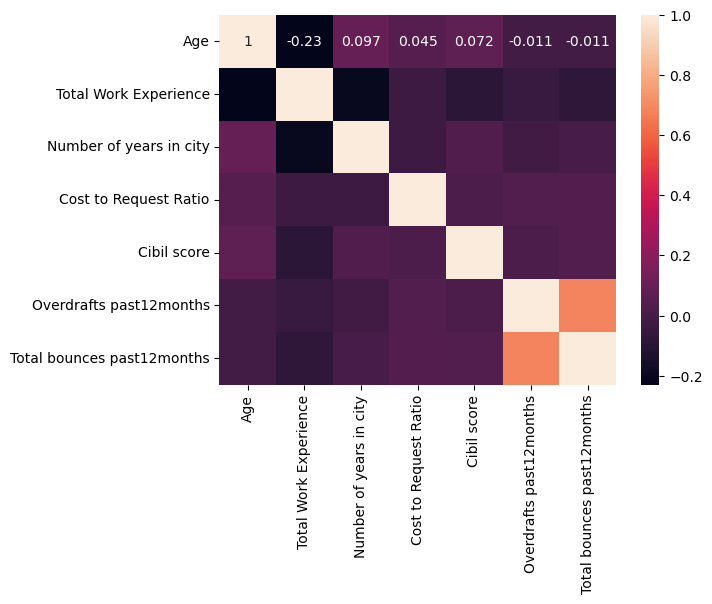

In [51]:
sns.heatmap(corrr,annot=True)

### 5) Display scatterplot between age & Total work Experience  

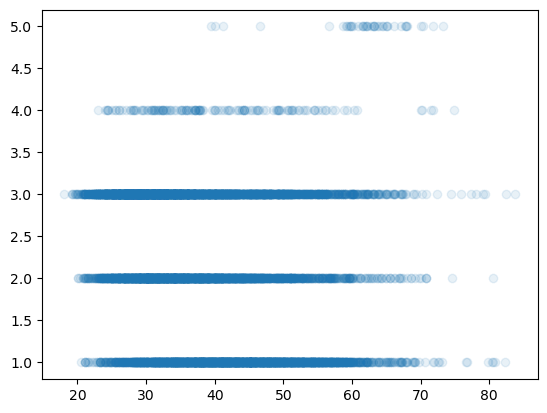

In [52]:
plt.scatter(df['Age'],df['Total Work Experience'],alpha=0.1)

### 

### 6) Display box plot for age

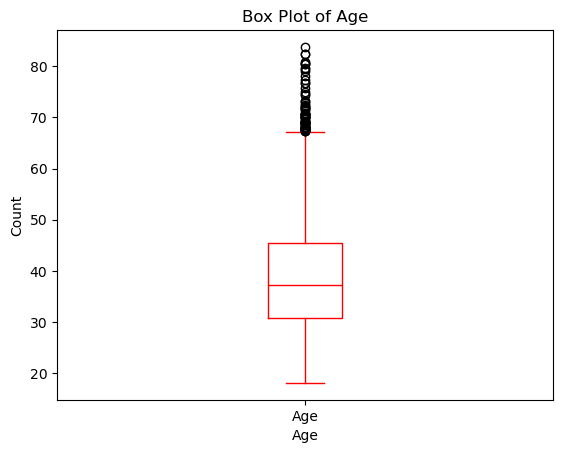

In [53]:
df['Age'].plot(kind="box",color="Red")
plt.xlabel('Age')
plt.ylabel("Count")
plt.title('Box Plot of Age');

### 7) Display box plot for Cibil score  

Text(0, 0.5, 'Count')

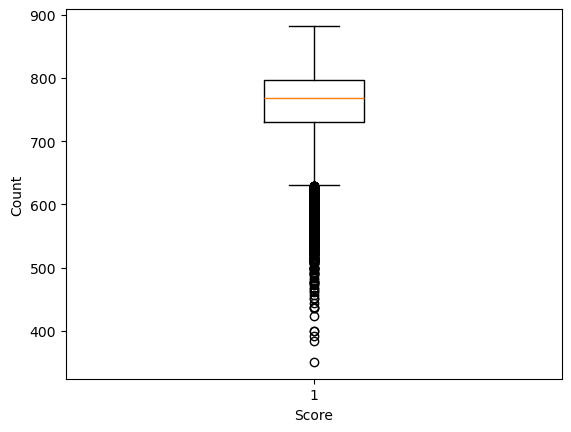

In [54]:
plt.boxplot(df["Cibil score"],widths=0.2,whis=1.5,showbox=True,)
plt.xlabel('Score')
plt.ylabel("Count")

### 8) Create target and features data where target is Total bounces past 12 months 

In [56]:
x=df.drop("Total bounces past12months",axis=1)
y=df['Total bounces past12months']

## Part-2: Working with Model 


### 1) Split data into training and testing sets 

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

<Axes: xlabel='Cibil score', ylabel='Age'>

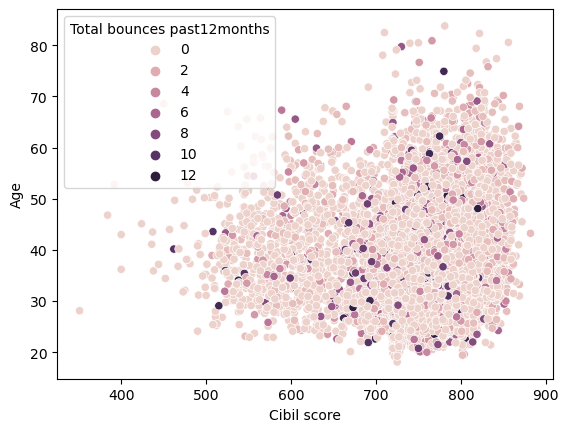

In [59]:
sns.scatterplot(y="Age",x="Cibil score",data=df ,hue="Total bounces past12months")

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
x_train=sc.fit_transform(x_train)

In [63]:
x_test=sc.transform(x_test)

### 2) Create a KNN classifier between Features and target data

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier()

In [66]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

### 3) Display the test score 

In [67]:
knn.score(x_test,y_test)

0.6858095590959614

### 4) Display the training score 

In [68]:
knn.score(x_train,y_train)

0.7304637865311309

In [69]:
y_pred=knn.predict(x_test)

### 5) Print the accuracy score 

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,y_pred)

0.6858095590959614

### 6) Try 1 to 14 k values for classifier 

In [72]:
score=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [97]:
score

[0.5728047424972212,
 0.6654316413486476,
 0.6646906261578363,
 0.6787699147832531,
 0.6858095590959614,
 0.6865505742867729,
 0.6913671730270471,
 0.6935902185994813,
 0.6921081882178585,
 0.6921081882178585,
 0.6917376806224528,
 0.6943312337902927,
 0.6950722489811041,
 0.6950722489811041]

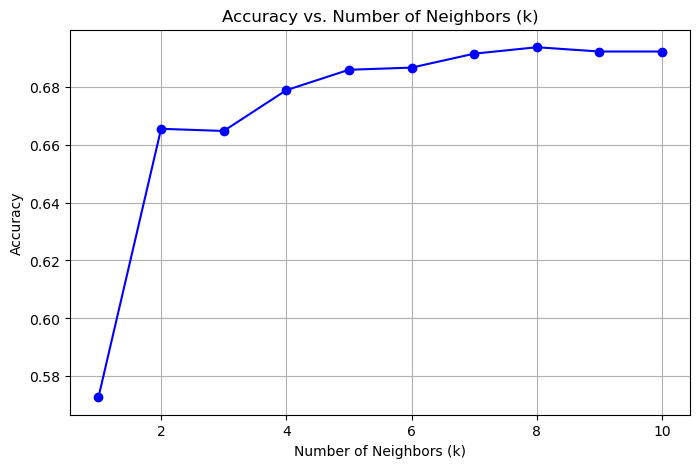

In [98]:
k_values = range(1,11)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [101]:
dic=[DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,SVC

In [102]:
for i in dic:
    model=i()
    model.fit(x_train,y_train)
    print(i)
    print(model.score(x_train,y_train))
    print(model.score(x_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
1.0
0.5509447943682846
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
1.0
0.6843275287143387
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.7304637865311309
0.6858095590959614
<class 'sklearn.svm._classes.SVC'>
0.7098157560355781
0.7032234160800297


In [115]:
param={"n_neighbors":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
       'weights':['uniform', 'distance'],
       'algorithm':['auto', 'ball_tree','kd_tree','brute']}
        

In [116]:
gd=GridSearchCV(knn,param_grid=param,cv=4,scoring='accuracy')

In [117]:
gd.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [118]:
gd.best_params_

{'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'uniform'}

In [120]:
gd.best_score_

0.6866264294790343

In [121]:
from sklearn.metrics import accuracy_score,classification_report

In [122]:
accuracy_score(y_test,knn.predict(x_test))

0.6921081882178585

In [124]:
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1776
           1       0.26      0.22      0.24       339
           2       0.11      0.04      0.06       158
           3       0.16      0.06      0.09       109
           4       0.11      0.05      0.07        63
           5       0.07      0.02      0.03        52
           6       0.15      0.04      0.07        45
           7       0.17      0.05      0.08        40
           8       0.21      0.11      0.14        38
           9       0.20      0.09      0.13        32
          10       0.00      0.00      0.00        17
          11       0.25      0.19      0.21        16
          12       0.25      0.07      0.11        14

    accuracy                           0.69      2699
   macro avg       0.21      0.15      0.16      2699
weighted avg       0.59      0.69      0.63      2699

